# Asymmetric collision between plane gravitational waves with variable polarisation by Hassan Feinstein and Manko
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 11, 2022

This appears to be part of the problem... there's a clash between sympy and numpy.  See link down at bottom.  The einstein and ricci tensors for this metric in particular will not compute.  See "EhlersKundtRosenMetric.ipynb"  Part of the reason appears to be the sinh and the cosh functions, and part of it might be the clash between sympy and numpy definitions.

In [ ]:
from sympy import init_session
init_session(use_latex=True)

In [93]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [94]:
u,v,x,y,du,dv,dx,dy,ds = symbols('u v x y du dv dx dy ds')

In [95]:
M = Function('M')(u,v)
M

In [96]:
U = Function('U')(u,v)
U

In [97]:
V = Function('V')(u,v)
V

In [98]:
W = Function('W')(u,v)
W

In [99]:
f = Function('f')(u,v)
f

In [100]:
#  g is reserved for metric so use next letter
h = Function('h')(u,v)
h

In [101]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [102]:
differentials = Matrix([du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [103]:
lineElement1 = Eq(ds**2,expand(2*exp(-M)*du*dv - exp(-U)* ( exp(V) * cosh(W) * dx**2 - 2*sinh(W)*dx*dy + exp(-V)*cosh(W)* dy**2)))
lineElement1 

In [104]:
#  Here we are replacing cosh with f and sinh with g
lineElement = lineElement1.rhs.subs(lineElement1.rhs.args[1].args[2],f).subs(lineElement1.rhs.args[2].args[2],f).subs(lineElement1.rhs.args[3].args[4],h)
lineElement

In [105]:
coshSub = Eq(f,cosh(W))
coshSub

In [106]:
sinhSub = Eq(h,sinh(W))
sinhSub

In [107]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                                           ⎤
⎢    0      ℯ                       0                            0              ⎥
⎢                                                                               ⎥
⎢ -M(u, v)                                                                      ⎥
⎢ℯ              0                   0                            0              ⎥
⎢                                                                               ⎥
⎢                                -U(u, v)  V(u, v)                -U(u, v)      ⎥
⎢    0          0      -f(u, v)⋅ℯ        ⋅ℯ              h(u, v)⋅ℯ              ⎥
⎢                                                                               ⎥
⎢                                    -U(u, v)                 -U(u, v)  -V(u, v)⎥
⎣    0          0           h(u, v)⋅ℯ               -f(u, v)⋅ℯ        ⋅ℯ        ⎦

In [108]:
import sympy

In [109]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                                           ⎤
⎢    0      ℯ                       0                            0              ⎥
⎢                                                                               ⎥
⎢ -M(u, v)                                                                      ⎥
⎢ℯ              0                   0                            0              ⎥
⎢                                                                               ⎥
⎢                                -U(u, v)  V(u, v)                -U(u, v)      ⎥
⎢    0          0      -f(u, v)⋅ℯ        ⋅ℯ              h(u, v)⋅ℯ              ⎥
⎢                                                                               ⎥
⎢                                    -U(u, v)                 -U(u, v)  -V(u, v)⎥
⎣    0          0           h(u, v)⋅ℯ               -f(u, v)⋅ℯ        ⋅ℯ        ⎦

In [110]:
from einsteinpy.symbolic import *

In [111]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [112]:
metric = MetricTensor(m,syms)

In [113]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                                             0                             
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                                             0                             
⎢⎢                                                                    

In [114]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                   4       ∂           ∂   
⎢                                                                  f (u, v)⋅──(M(u, v))⋅──(U
⎢                                                                           ∂u          ∂u  
⎢                                                                                           
⎢                                                                  ─────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

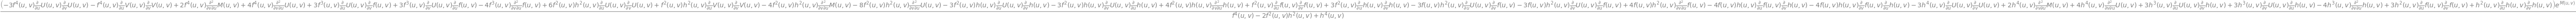

In [115]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [116]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [117]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [118]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [119]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                   4       ∂           ∂   
⎢                                                                  f (u, v)⋅──(M(u, v))⋅──(U
⎢                                                                           ∂u          ∂u  
⎢                                                                                           
⎢                                                                  ─────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [120]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                         2                                 
⎢                                    4       ⎛∂          ⎞                             4    
⎢                                   f (u, v)⋅⎜──(U(u, v))⎟               2            f (u, 
⎢ 4       ∂           ∂                      ⎝∂u         ⎠     4        ∂                   
⎢f (u, v)⋅──(M(u, v))⋅──(U(u, v)) - ─────────────────────── + f (u, v)⋅───(U(u, v)) - ──────
⎢         ∂u          ∂u                       2                         2                  
⎢                                                                      ∂u                   
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

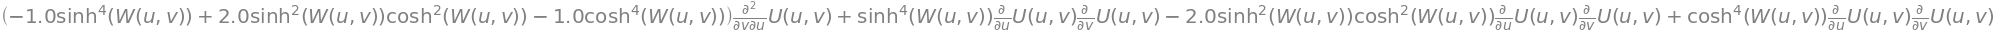

In [136]:
einstein01 = collect(expand(einsteinSimplified[1,0].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).args[1].doit()) , diff(U,u,v) )
einstein01

In [145]:
#  For whatever reason, it won't solve this equation for the mixed partial... but further simplifcation shows it is possible 
solve(einstein01, diff(U,u,v) ) 

In [138]:
einstein01.coeff(diff(U,u,v)).simplify()

In [141]:
einstein01.subs(diff(U,u,v),0).simplify()

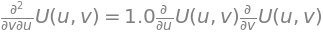

In [142]:
#  This is correct, but there has to be an easier way to do this....
Eq(diff(U,u,v), einstein01.subs(diff(U,u,v),0).simplify())

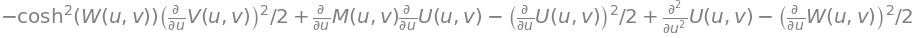

In [154]:
ricci00 = ricciSimplified[0,0].args[1].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit().expand().simplify()
ricci00

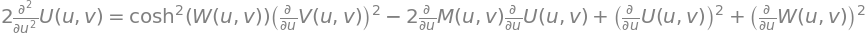

In [162]:
d2udu2 = Eq( 2*diff(U,u,u),2*solve( ricci00 , diff(U,u,u))[0] ) 
d2udu2 

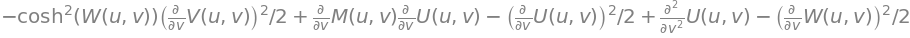

In [158]:
ricci11 = ricciSimplified[1,1].args[1].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit().expand().simplify()
ricci11

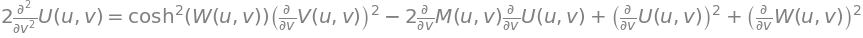

In [161]:
d2udv2 = Eq(2*diff(U,v,v),2*solve( ricci11, diff(U,v,v) )[0] ) 
d2udv2

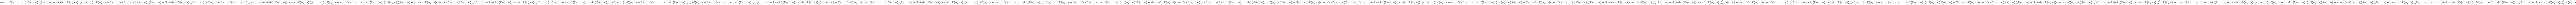

In [177]:
einstein22 = einsteinSimplified[2,2].args[2].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit().expand()
einstein22

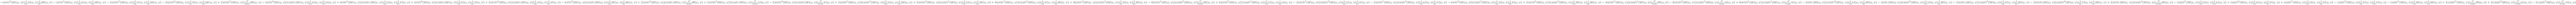

In [176]:
einstein33 = einsteinSimplified[3,3].args[2].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit().expand()
einstein33

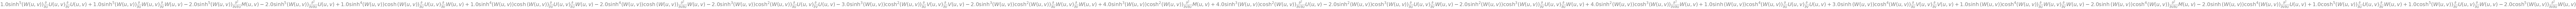

In [179]:
einstein23 = einsteinSimplified[2,3].args[1].subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit().expand()
einstein23

In [181]:
( einstein22 + einstein33 ).simplify() 

NotImplementedError: Improve MV Derivative support in collect

In [183]:
ricciSubstituted = ricciSimplified.subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit()
ricciSubstituted

⎡                                                                                           
⎢                                                                                           
⎢                                                          ⎛                           2    
⎢                                                          ⎜              ⎛∂          ⎞     
⎢                                                        - ⎜sinh(W(u, v))⋅⎜──(W(u, v))⎟  + c
⎢                                                          ⎜              ⎝∂u         ⎠     
⎢                                                          ⎝                                
⎢                                                        ───────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [184]:
einsteinSubstituted = einsteinSimplified.subs(coshSub.lhs,coshSub.rhs).subs(sinhSub.lhs,sinhSub.rhs).doit()
einsteinSubstituted

⎡                                                                                           
⎢                                                                                           
⎢  ⎛                           2                   2         ⎞                  ⎛           
⎢  ⎜              ⎛∂          ⎞                   ∂          ⎟     3            ⎜           
⎢- ⎜sinh(W(u, v))⋅⎜──(W(u, v))⎟  + cosh(W(u, v))⋅───(W(u, v))⎟⋅sinh (W(u, v)) + ⎜sinh(W(u, v
⎢  ⎜              ⎝∂u         ⎠                    2         ⎟                  ⎜           
⎢  ⎝                                             ∂u          ⎠                  ⎝           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [189]:
collect( einsteinSubstituted[1,0].args[1], diff(U,u,v) ) 

NotImplementedError: Improve MV Derivative support in collect

#  This is absolute insanity
https://stackoverflow.com/questions/32640759/what-causes-this-error-attributeerror-mul-object-has-no-attribute-cos-in

https://github.com/sympy/sympy/issues/9068